### 1.线性回归LinearRegression

#### 1.1 导入包并配置GPU

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import tensorflow as tf 
phy_gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in phy_gpus:
   tf.config.experimental.set_memory_growth(gpu,True)

import numpy as np
import matplotlib.pyplot as plt

# Keras顺序构成的模型
from tensorflow.keras import Sequential
# Dense全连接层
from tensorflow.keras.layers import Dense

#### 1.2 生成数据集

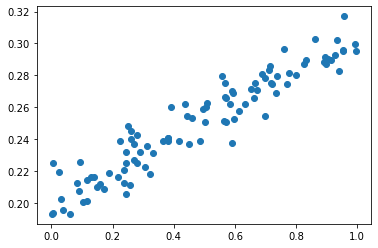

In [2]:
# 利用numpy生成100个随机点
x_data = np.random.rand(100)

#加入噪声
noise = np.random.normal(0,0.01,x_data.shape)

# y=0.1*x+0.2
y_data = x_data*0.1+0.2+noise

# 显示随机点
plt.scatter(x_data,y_data)
plt.show()

####  1.3 构建模型

In [3]:
model = Sequential()

# units输出维度 input_dim输入维度
model.add(Dense(units=1,input_dim=1,name='dense_1'))
model.compile(optimizer='sgd',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


####  1.4 训练模型（迭代10001次）

In [4]:
for step in range(10001):
    cost = model.train_on_batch(x_data,y_data)
    if step%1000 ==0: #每1000次打印一次loss
        print('cost:',cost)

cost: 0.49645107984542847
cost: 0.010410988703370094
cost: 0.0008439897210337222
cost: 0.00015062002057675272
cost: 0.00010036814637714997
cost: 9.672607120592147e-05
cost: 9.646210673963651e-05
cost: 9.644300007494166e-05
cost: 9.644161036703736e-05
cost: 9.644150850363076e-05
cost: 9.64414793998003e-05


####  1.5 输出训练好的权重

训练得到的权重参数  W: [[0.10312883]] b: [0.20110881]


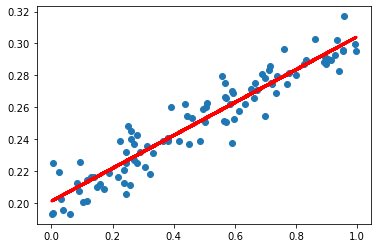

In [5]:
W,b=model.layers[0].get_weights()
print("训练得到的权重参数 ",'W:',W,'b:',b)

#预测值
y_pred = model.predict(x_data)
plt.scatter(x_data,y_data)
plt. plot(x_data,y_pred,'r-',lw=3)
plt.show()

### 2.非线性回归NonLinearRegression

#### 2.1 导入需要的API

In [6]:
# keras顺序构成模型
from tensorflow.keras import Sequential
# Dense全连接层
from tensorflow.keras.layers import Dense,Activation
# 导入SGD优化器
from tensorflow.keras.optimizers import SGD

#### 2.2 生成数据

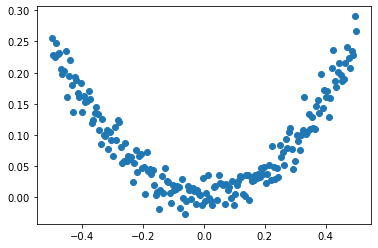

In [7]:
# 利用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)
noise = np.random.normal(0,0.02,x_data.shape)
# y=x^2
y_data = np.square(x_data)+noise

# 显示随机点
plt.scatter(x_data,y_data)
plt.show()

#### 2.3 定义模型和优化方法

调整学习率的方法：
* 默认lr=0.01，首先导入优化算法，比如SGD：from keras.optimizers import SGD
* 然后定义一个指定学习率的sgd对象：sgd=SGD(lr=0.1）
* 最后将sgd传给complie来指定优化方法：model.compile(optimizer=sgd,loss='mse')

In [8]:
model = Sequential()

# 定义优化算法并指定学习率
sgd = SGD(lr=0.1)

#构建一个1-10-1结构的网络
model.add(Dense(units=10,input_dim=1,name='fc_1'))
model.add(Activation('tanh'))
model.add(Dense(units=1,input_dim=10,name='fc_2'))
model.add(Activation('tanh'))

# 编译模型，打印出模型结构
model.compile(optimizer=sgd,loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc_1 (Dense)                 (None, 10)                20        
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
fc_2 (Dense)                 (None, 1)                 11        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### 2.4 训练模型并预测

cost 0.03165988624095917
cost 0.00471403868868947
cost 0.0026752541307359934
cost 0.0008611649391241372
cost 0.00040410421206615865
cost 0.00036254923907108605
cost 0.00035971938632428646
cost 0.00035923533141613007
cost 0.00035893358290195465
cost 0.00035868771374225616
cost 0.0003584811929613352


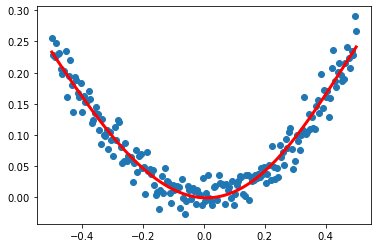

In [9]:
for step in range(10001):
    cost=model.train_on_batch(x_data,y_data)
    if step%1000==0:
        print("cost",cost)
              
y_pred = model.predict(x_data)
plt.scatter(x_data,y_data)
plt. plot(x_data,y_pred,'r-',lw=3)
plt.show()